In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

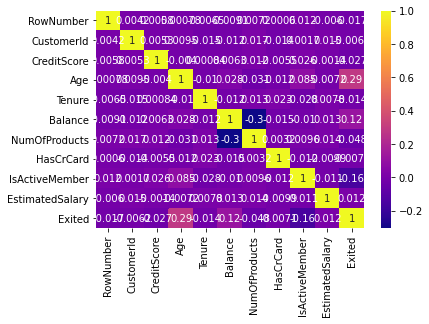

In [4]:
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [25]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [26]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\Sukumar\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

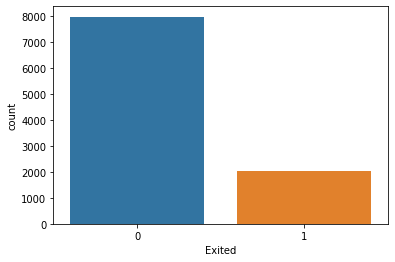

In [27]:
sns.countplot(df.Exited)

In [28]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

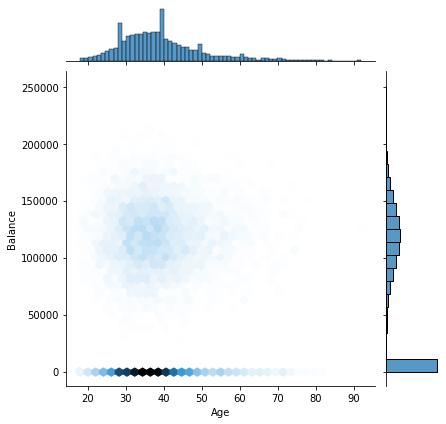

In [29]:
sns.jointplot(x='Age',y='Balance',data=df,kind='hex')

In [30]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
dummy_gender=pd.get_dummies(df.Gender,drop_first=True)
dummy_geo=pd.get_dummies(df.Geography,drop_first=True)
df=pd.concat([df,dummy_gender,dummy_geo],axis=1)
df.drop(columns=['Geography','Gender'],inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [9]:
from sklearn.model_selection import train_test_split
X=df.drop('Exited',axis=1).values
y=df['Exited'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [12]:
model=Sequential()
model.add(Dense(6,activation='relu',kernel_initializer='glorot_uniform',input_dim=11))
model.add(Dense(6,activation='relu',kernel_initializer='glorot_uniform',input_dim=11))
model.add(Dense(5,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(4,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='he_uniform'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 35        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train,y_train,epochs=200,batch_size=10,validation_data=(X_test,y_test))

Epoch 1/200
700/700 [==============================] - 1s 1ms/step - loss: 0.6335 - accuracy: 0.7337 - val_loss: 0.5691 - val_accuracy: 0.7990
Epoch 2/200
700/700 [==============================] - 1s 1ms/step - loss: 0.5424 - accuracy: 0.7953 - val_loss: 0.5108 - val_accuracy: 0.7990
Epoch 3/200
700/700 [==============================] - 1s 1ms/step - loss: 0.4874 - accuracy: 0.8149 - val_loss: 0.4633 - val_accuracy: 0.8193
Epoch 4/200
700/700 [==============================] - 1s 1ms/step - loss: 0.4525 - accuracy: 0.8263 - val_loss: 0.4426 - val_accuracy: 0.8230
Epoch 5/200
700/700 [==============================] - 1s 1ms/step - loss: 0.4367 - accuracy: 0.8307 - val_loss: 0.4325 - val_accuracy: 0.8260
Epoch 6/200
700/700 [==============================] - 1s 1ms/step - loss: 0.4262 - accuracy: 0.8317 - val_loss: 0.4244 - val_accuracy: 0.8310
Epoch 7/200
700/700 [==============================] - 1s 1ms/step - loss: 0.4166 - accuracy: 0.8346 - val_loss: 0.4139 - val_accuracy: 0.8347

In [16]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
loss_df=pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.633492,0.733714,0.569085,0.799000
1,0.542449,0.795286,0.510831,0.799000
2,0.487382,0.814857,0.463327,0.819333
3,0.452542,0.826286,0.442608,0.823000
4,0.436691,0.830714,0.432534,0.826000


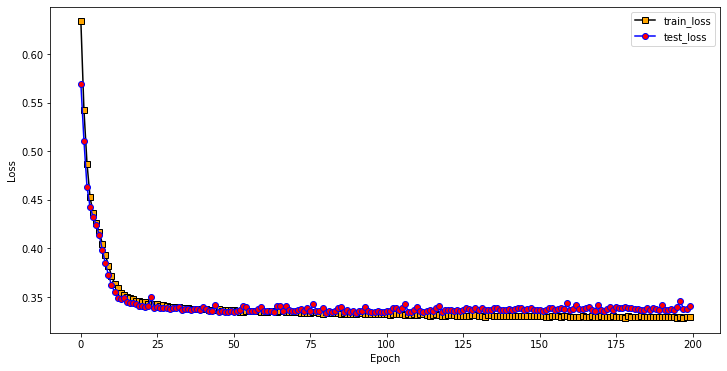

In [31]:
plt.figure(figsize=(12,6))
plt.plot(loss_df.loss,marker='s',markerfacecolor='orange',c='black',label='train_loss')
plt.plot(loss_df.val_loss,marker='o',markerfacecolor='red',c='blue',label='test_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

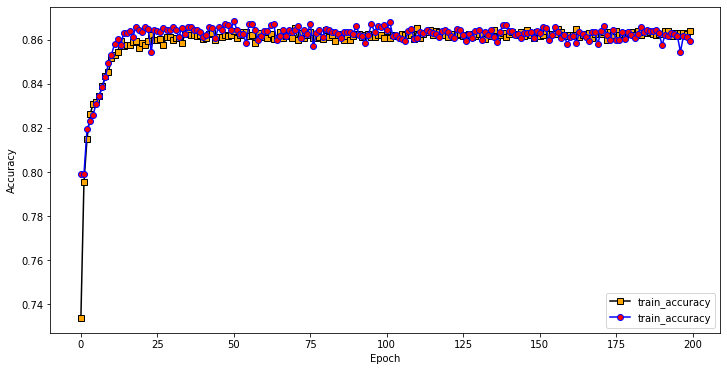

In [32]:
plt.figure(figsize=(12,6))
plt.plot(loss_df.accuracy,marker='s',markerfacecolor='orange',c='black',label='train_accuracy')
plt.plot(loss_df.val_accuracy,marker='o',markerfacecolor='red',c='blue',label='train_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [44]:
predictions=model.predict(X_test)
predictions=(predictions>0.5)
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [45]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[2280  111]
 [ 297  312]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2391
           1       0.74      0.51      0.60       609

    accuracy                           0.86      3000
   macro avg       0.81      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000

0.864


Using Dropout 

In [56]:
model1=Sequential()
model1.add(Dense(6,activation='relu',kernel_initializer='glorot_uniform',input_dim=11))
model1.add(Dropout(0.3))
model1.add(Dense(6,activation='relu',kernel_initializer='glorot_uniform',input_dim=11))
model1.add(Dropout(0.2))
model1.add(Dense(5,activation='relu',kernel_initializer='glorot_uniform'))
model1.add(Dense(4,activation='relu',kernel_initializer='glorot_uniform'))
model1.add(Dense(1,activation='sigmoid',kernel_initializer='he_uniform'))
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 6)                 72        
_________________________________________________________________
dropout_3 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_4 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 35        
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [58]:
model1.fit(X_train,y_train,epochs=200,batch_size=10)

Epoch 1/200
700/700 [==============================] - 1s 986us/step - loss: 0.5258 - accuracy: 0.7960
Epoch 2/200
700/700 [==============================] - 1s 823us/step - loss: 0.4823 - accuracy: 0.7960
Epoch 3/200
700/700 [==============================] - 1s 829us/step - loss: 0.4671 - accuracy: 0.7960
Epoch 4/200
700/700 [==============================] - 1s 869us/step - loss: 0.4589 - accuracy: 0.7960
Epoch 5/200
700/700 [==============================] - 1s 909us/step - loss: 0.4491 - accuracy: 0.7960
Epoch 6/200
700/700 [==============================] - 1s 893us/step - loss: 0.4490 - accuracy: 0.7960
Epoch 7/200
700/700 [==============================] - 1s 877us/step - loss: 0.4420 - accuracy: 0.7960
Epoch 8/200
700/700 [==============================] - 1s 856us/step - loss: 0.4426 - accuracy: 0.7960
Epoch 9/200
700/700 [==============================] - 1s 899us/step - loss: 0.4371 - accuracy: 0.7977
Epoch 10/200
700/700 [==============================] - 1s 907us/step - l

In [59]:
loss_df1=pd.DataFrame(model1.history.history)
loss_df1.head()

,loss,accuracy
0,0.525781,0.796
1,0.482322,0.796
2,0.467052,0.796
3,0.458859,0.796
4,0.449131,0.796


Text(0, 0.5, 'Loss')

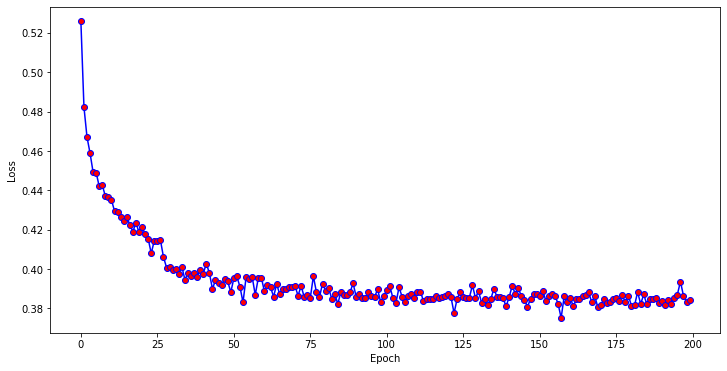

In [60]:
plt.figure(figsize=(12,6))
plt.plot(loss_df1.loss,marker='o',markerfacecolor='red',c='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

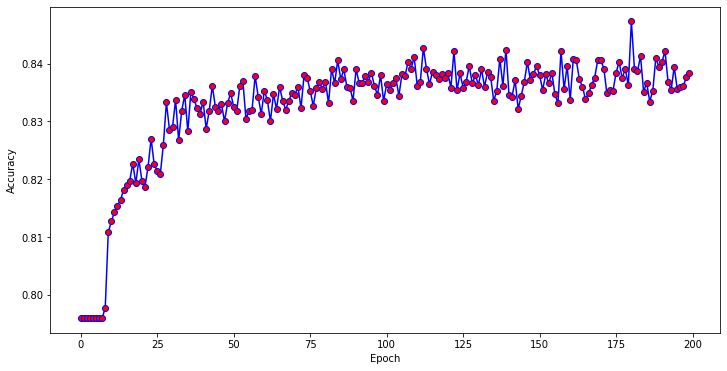

In [65]:
plt.figure(figsize=(12,6))
plt.plot(loss_df1.accuracy,marker='o',markerfacecolor='red',c='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [62]:
predictions1=model1.predict(X_test)
predictions1=(predictions1>0.5)
predictions1

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [63]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))
print(accuracy_score(y_test,predictions1))                   #for dense layers we should use dropout but for short layers we should ignore

[[2278  113]
 [ 328  281]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2391
           1       0.71      0.46      0.56       609

    accuracy                           0.85      3000
   macro avg       0.79      0.71      0.74      3000
weighted avg       0.84      0.85      0.84      3000

0.853
